In [47]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [48]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [49]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 0.1
ypole = 0.02
zpole = -0.06

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [50]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [51]:
model = MultiDipoleModel(poles=1, lrate=0.0005, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=.0000000002)
test_epochs = 500

In [52]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 28.590246
epoch  1 --- Loss --- 19.615494
epoch  2 --- Loss --- 13.185378
epoch  3 --- Loss --- 8.675809
epoch  4 --- Loss --- 5.5844746
epoch  5 --- Loss --- 3.5115144
epoch  6 --- Loss --- 2.1521227
epoch  7 --- Loss --- 1.282261
epoch  8 --- Loss --- 0.7408816
epoch  9 --- Loss --- 0.41422847
epoch  10 --- Loss --- 0.22368851
epoch  11 --- Loss --- 0.1164866
epoch  12 --- Loss --- 0.05842015
epoch  13 --- Loss --- 0.02818551
epoch  14 --- Loss --- 0.013069068
epoch  15 --- Loss --- 0.0058190534
epoch  16 --- Loss --- 0.0024860098
epoch  17 --- Loss --- 0.0010183494
epoch  18 --- Loss --- 0.00039965013
epoch  19 --- Loss --- 0.00015015205
epoch  20 --- Loss --- 5.3952906e-05
epoch  21 --- Loss --- 1.8531367e-05
epoch  22 --- Loss --- 6.0719685e-06
epoch  23 --- Loss --- 1.8947293e-06
epoch  24 --- Loss --- 5.645991e-07
epoch  25 --- Loss --- 1.5934103e-07
epoch  26 --- Loss --- 4.2505008e-08
epoch  27 --- Loss --- 1.0735365e-08
epoch  28 --- Loss --- 2.5593896e-

In [53]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 0.36644482215245566 minutes


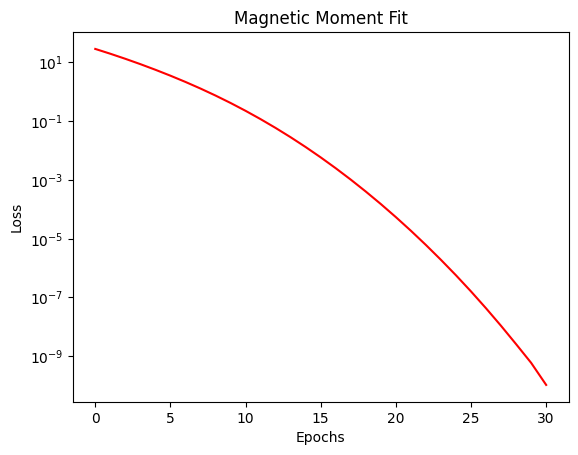

In [54]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [55]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.09999982  0.02       -0.05999997]]
Input
[[0.1, 0.02, -0.06]]


In [56]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.9998152256012
Percentage Accuracy Y-axis 99.99998360872269
Percentage Accuracy Z-axis 99.99994809428851
********************************
Average Accuracy:  99.9999156428708
